# Ford GoBike Data Exploration
## by Rafeek Abadir

## Preliminary Wrangling

This document explores a dataset that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Loading data into a dataframe, and performing some high-level overview
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.shape

(183412, 16)

In [4]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

The dataset has 183142 rows, and 16 columns describing trip attributes. The time related attributes are numeric, and there are categorical attributes, such as user_type, memeber_birth_year and member_gender.

### What is/are the main feature(s) of interest in your dataset?

I would like to explore the relationship between trip duration and time of day, and day of week, and effect of memeber age and gender on the trip duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The dataset has sufficient observations to draw conclusions regarding the questions above. There is trip start time, which can provide required info related to trip day, weekday and hour. The dataset has also user birth year, which can help in obtaining user age.

## Data Cleaing

Let's start with dropping columns that will not be used in our investigation

In [6]:
df.drop(['start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 
         'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude',
         'end_time', 'bike_id'], axis=1, inplace=True)

In [7]:
df.head()

,duration_sec,start_time,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,Subscriber,1974.0,Male,Yes


It will be useful now to convert the start_time column into datetime

In [8]:
df.start_time=pd.to_datetime(df.start_time)

As trip durations in seconds is not easily interpreted, I will add duration_min column to convert duraiton into minutes.

In [9]:
df['duration_min']=df.duration_sec/60

Let's have a look over the dataset statistics now

In [10]:
df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   user_type                183412 non-null  object        
 3   member_birth_year        175147 non-null  float64       
 4   member_gender            175147 non-null  object        
 5   bike_share_for_all_trip  183412 non-null  object        
 6   duration_min             183412 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 9.8+ MB


(        duration_sec  member_birth_year   duration_min
 count  183412.000000      175147.000000  183412.000000
 mean      726.078435        1984.806437      12.101307
 std      1794.389780          10.116689      29.906496
 min        61.000000        1878.000000       1.016667
 25%       325.000000        1980.000000       5.416667
 50%       514.000000        1987.000000       8.566667
 75%       796.000000        1992.000000      13.266667
 max     85444.000000        2001.000000    1424.066667,
 None)

We can see here that member gender and birth year have some missing values.

The current dataframe can be used to explore features related to trip duration, and timing. But in order to fit exploring the effect of member features, we will drop the null values.

In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   user_type                175147 non-null  object        
 3   member_birth_year        175147 non-null  float64       
 4   member_gender            175147 non-null  object        
 5   bike_share_for_all_trip  175147 non-null  object        
 6   duration_min             175147 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 10.7+ MB


In [13]:
df.describe()

,duration_sec,member_birth_year,duration_min
count,175147.000000,175147.000000,175147.000000
mean,704.211845,1984.806437,11.736864
std,1641.608363,10.116689,27.360139
min,61.000000,1878.000000,1.016667
25%,323.000000,1980.000000,5.383333
50%,510.000000,1987.000000,8.500000
75%,789.000000,1992.000000,13.150000
max,84548.000000,2001.000000,1409.133333


Let's also extract day, weekday and hour from start_time column

In [14]:
df['day']=df.start_time.dt.day
df['hour']=df.start_time.dt.hour
df['weekday']=df.start_time.dt.weekday
df.head()

,duration_sec,start_time,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,day,hour,weekday
0,52185,2019-02-28 17:32:10.145,Customer,1984.0,Male,No,869.750000,28,17,3
2,61854,2019-02-28 12:13:13.218,Customer,1972.0,Male,No,1030.900000,28,12,3
3,36490,2019-02-28 17:54:26.010,Subscriber,1989.0,Other,No,608.166667,28,17,3
4,1585,2019-02-28 23:54:18.549,Subscriber,1974.0,Male,Yes,26.416667,28,23,3
5,1793,2019-02-28 23:49:58.632,Subscriber,1959.0,Male,No,29.883333,28,23,3


Let's also Add a column for member age

In [15]:
df['age'] = 2019 - df.member_birth_year

In [16]:
#Looking into ovservations with age > 100 years old
df[df.age > 100].describe()

,duration_sec,member_birth_year,duration_min,day,hour,weekday,age
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,656.361111,1900.222222,10.939352,15.472222,13.416667,2.625000,118.777778
std,473.936625,2.979849,7.898944,7.877535,4.471349,1.916845,2.979849
min,85.000000,1878.000000,1.416667,1.000000,6.000000,0.000000,109.000000
25%,310.250000,1900.000000,5.170833,9.500000,9.000000,1.000000,118.750000
50%,470.500000,1900.000000,7.841667,15.000000,14.500000,2.000000,119.000000
75%,1055.750000,1900.250000,17.595833,22.000000,18.000000,4.000000,119.000000
max,1893.000000,1910.000000,31.550000,28.000000,21.000000,6.000000,141.000000


There are 71 observations with user age > 100 years old, with min age of 109 years old, and mean age 118 years old

Since these values are not realistic, we will drop them

In [17]:
df.drop(df[df.age>100].index, axis=0, inplace=True)

In [18]:
df.describe()

,duration_sec,member_birth_year,duration_min,day,hour,weekday,age
count,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000
mean,704.231524,1984.841222,11.737192,15.314711,13.456313,2.619837,34.158778
std,1641.917862,9.972079,27.365298,8.033343,4.733468,1.808735,9.972079
min,61.000000,1920.000000,1.016667,1.000000,0.000000,0.000000,18.000000
25%,323.000000,1980.000000,5.383333,8.000000,9.000000,1.000000,27.000000
50%,510.000000,1987.000000,8.500000,15.000000,14.000000,3.000000,32.000000
75%,789.000000,1992.000000,13.150000,22.000000,17.000000,4.000000,39.000000
max,84548.000000,2001.000000,1409.133333,28.000000,23.000000,6.000000,99.000000


## Univariate Exploration


Let's start by exploring the distribution of trip duraiton

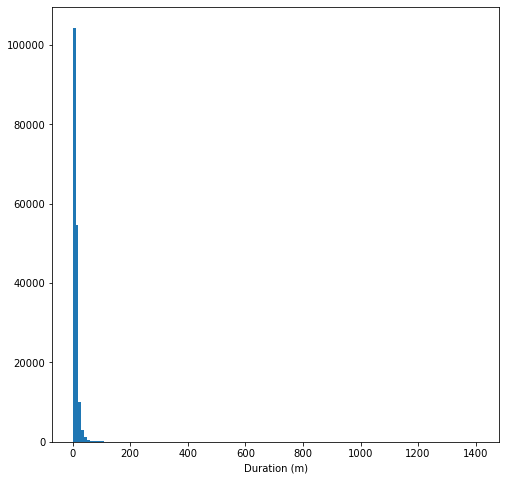

In [19]:
bin_size = 10
bins = np.arange(0, df.duration_min.max()+bin_size, bin_size)
plt.figure(figsize=[8,8])
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xlabel('Duration (m)');

It looks like there are large durations causing the plot to look like a spike on the left. Let's focus on the range with most observations

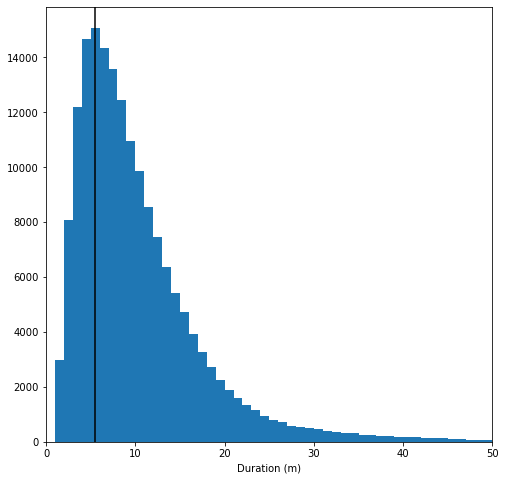

In [20]:
bin_size = 1
bins = np.arange(0, df.duration_min.max()+bin_size, bin_size)
plt.figure(figsize=[8,8])
plt.hist(data = df, x = 'duration_min', bins = bins);

plt.xlim(0, 50)
plt.xlabel('Duration (m)');

plt.axvline(5.5, color='k');

The Duration distribution is unimodal and very skewed to the right, With the mod at 5 min.

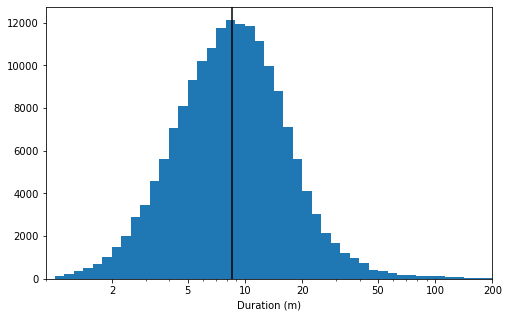

In [21]:
# Checking duration distribution on log scale
bin_size = .05
bins = 10**np.arange(0, np.log10(df.duration_min.max())+bin_size, bin_size)
plt.figure(figsize=[8,5])
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log')
plt.xlabel('Duration (m)');
ticks=[ 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
labels=['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);
plt.axvline(8.5, color='k');
plt.xlim(.9, 200);

Distribution on log scale still right skewed, but it is closer to normal distribution, with mod at 8.5 min.

Moving now to another Feature, Which is the trip starting hour, this is a categorical feature, so countplot will be suitable for this invistigation.

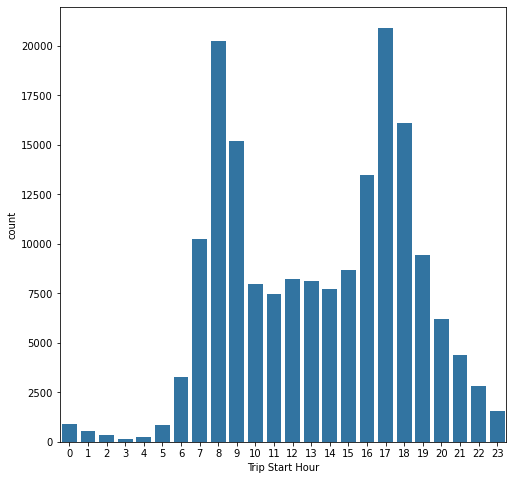

In [22]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[8,8])
sb.countplot(data = df, x = 'hour', color= base_color);
plt.xlabel('Trip Start Hour');

The plot is bimodal, with two mods at 8 am and 5 pm, which makes perfect sense, as those are the rush hours.

Moving forward to Day of trip, which is a categorical feature as well.

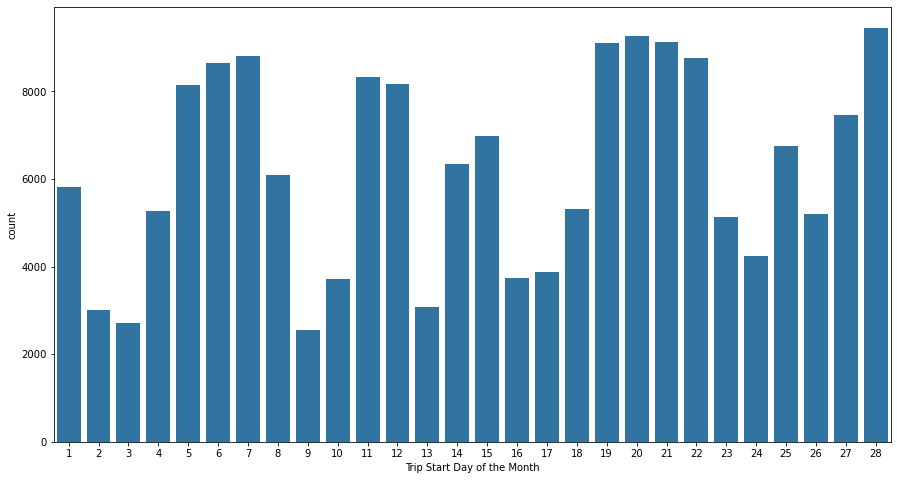

In [23]:
plt.figure(figsize=[15,8])
sb.countplot(data = df, x = 'day', color= base_color);
plt.xlabel('Trip Start Day of the Month');

We Can sea fluctuations in number of trips per day across the month, it is clear that weekend days show less number of trips. 

Wedensday 13th of Feb 2019, shows lower than expected numbers.

In [24]:
df[df.day == 13].count()

duration_sec               3077
start_time                 3077
user_type                  3077
member_birth_year          3077
member_gender              3077
bike_share_for_all_trip    3077
duration_min               3077
day                        3077
hour                       3077
weekday                    3077
age                        3077
dtype: int64

Looking now to the distribution over weekdays, another categorical feature

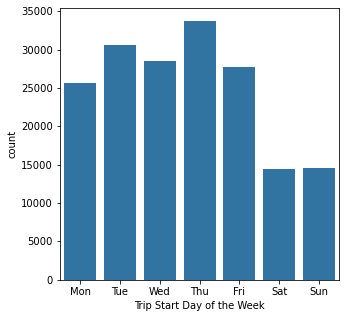

In [25]:
plt.figure(figsize=[5,5])
sb.countplot(data = df, x = 'weekday', color= base_color);
plt.xlabel('Trip Start Day of the Week');
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);

We May now have a look on Trip distribution over the Age, This is considered a discrete numeric Feature

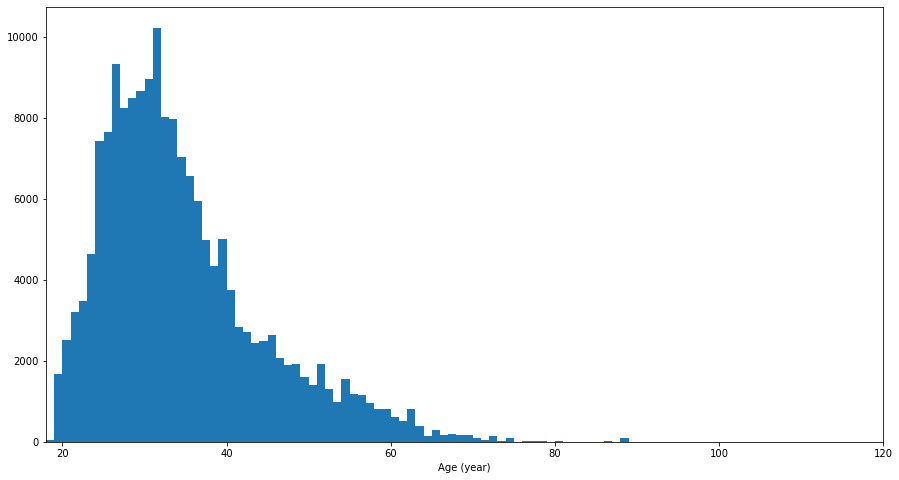

In [26]:
bin_size = 1
bins = np.arange(0, df.age.max()+bin_size, bin_size)
plt.figure(figsize=[15,8])
plt.hist(data = df, x = 'age', bins = bins);
plt.xlabel('Age (year)');
plt.xlim(18, 120);

Setting the limits to have a closer look we will get:

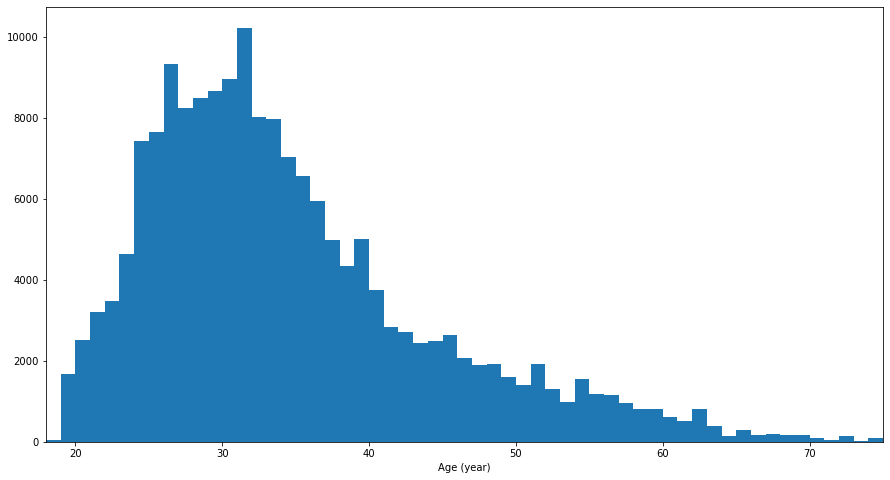

In [27]:
bin_size = 1
bins = np.arange(0, df.age.max()+bin_size, bin_size)
plt.figure(figsize=[15,8])
plt.hist(data = df, x = 'age', bins = bins);
plt.xlabel('Age (year)');
plt.xlim(18, 75);

It is a right skewed distribution, with a mod at 31 years. There is another spike at 26 years.
The curve starts at 18, probably this is the youngest age allowed to use the bikes.
This distribution also makes sense, as it is expected to see less number of bike rides after 40, as elder people move less.

Now let's have a look on different values of user type, member gender and bike-share-for-all trips. Those are categorical features with few number of values.

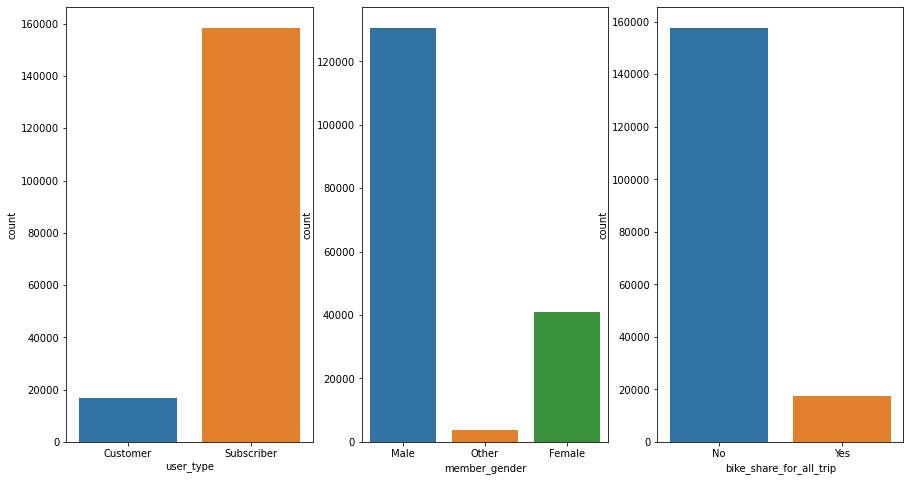

In [28]:
plt.figure(figsize=[15, 8])
plt.subplot(1, 3, 1)
sb.countplot(data = df, x = 'user_type');
plt.subplot(1, 3, 2)
sb.countplot(data = df, x = 'member_gender');
plt.subplot(1, 3, 3)
sb.countplot(data = df, x = 'bike_share_for_all_trip');

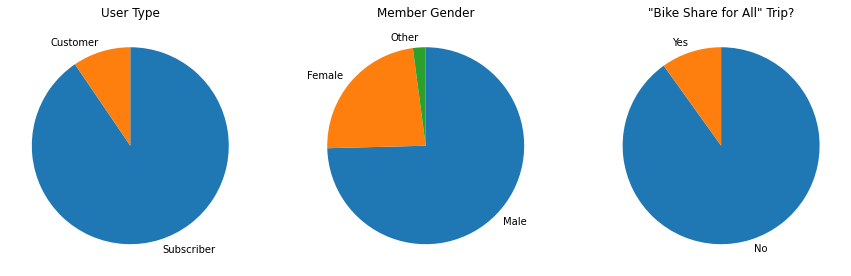

In [29]:
plt.figure(figsize=[15, 8])
plt.subplot(1, 3, 1)
type_counts=df.user_type.value_counts()
plt.pie(type_counts, labels=type_counts.index, startangle = 90, counterclock = False);
plt.title('User Type')
plt.subplot(1, 3, 2)
gender_counts=df.member_gender.value_counts()
plt.title('Member Gender')
plt.pie(gender_counts, labels=gender_counts.index, startangle = 90, counterclock = False);
plt.subplot(1, 3, 3)
program_counts=df.bike_share_for_all_trip.value_counts()
plt.pie(program_counts, labels=program_counts.index, startangle = 90, counterclock = False);
plt.title('"Bike Share for All" Trip?');

In [30]:
#Proportions of the above blots
type_counts/df.shape[0]*100, gender_counts/df.shape[0]*100, program_counts/df.shape[0]*100

(Subscriber    90.503499
 Customer       9.496501
 Name: user_type, dtype: float64,
 Male      74.593174
 Female    23.321434
 Other      2.085392
 Name: member_gender, dtype: float64,
 No     90.100243
 Yes     9.899757
 Name: bike_share_for_all_trip, dtype: float64)

From the above pie charts we can see that, more than 90% of the users are subscribers. I would expect that it is cheaper to use the bikes if you are a subscriber.

Males represent almost 75% of the users, while females represent 23%, There is a small persentage of 2% that are of other genders.

About 10% of the users were part of the "Bike Share for All" program, which targets people with low income.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


Trip duration distribution was very skewed to the right, I used the log transformation to have a closer look. After limiting the X axis it looked close to normal distribution.

Trips start the most at 8 am and 5 pm.

It is clear that trip numbers are less on weekends, however, on 13th of Feb 2021 number of trips was much lower than expected.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


I have removed the columns that are not of interest for this investigations. There were also rows with missing user related values (like year of birth and gender). Also the exploration showed trips done by users older than 100 years old (with mean higher than 118 years old).

They total nuber of rows with nulls or non realistic data was about 4.5% of all the observations, so I prefered to drop them.

## Bivariate Exploration

Let's start with having a look on the relationship between numeric variables

In [31]:
numeric_vars = ['duration_min', 'day', 'hour', 'weekday', 'age']
categoric_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip']

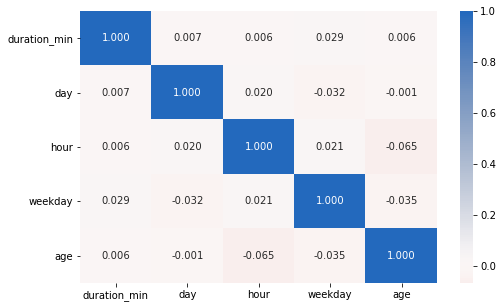

In [32]:
# Plot correlation heatmap
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

It is clear that numeric varibles are not correlated, which is expected, as most of our numeric variables are actually drived from start times.

There will be no correlation between day, hour and weekday. So, practically speaking we were looking for correlation between duration and any of the start time variables, but we found no evidance for such a corrlation.

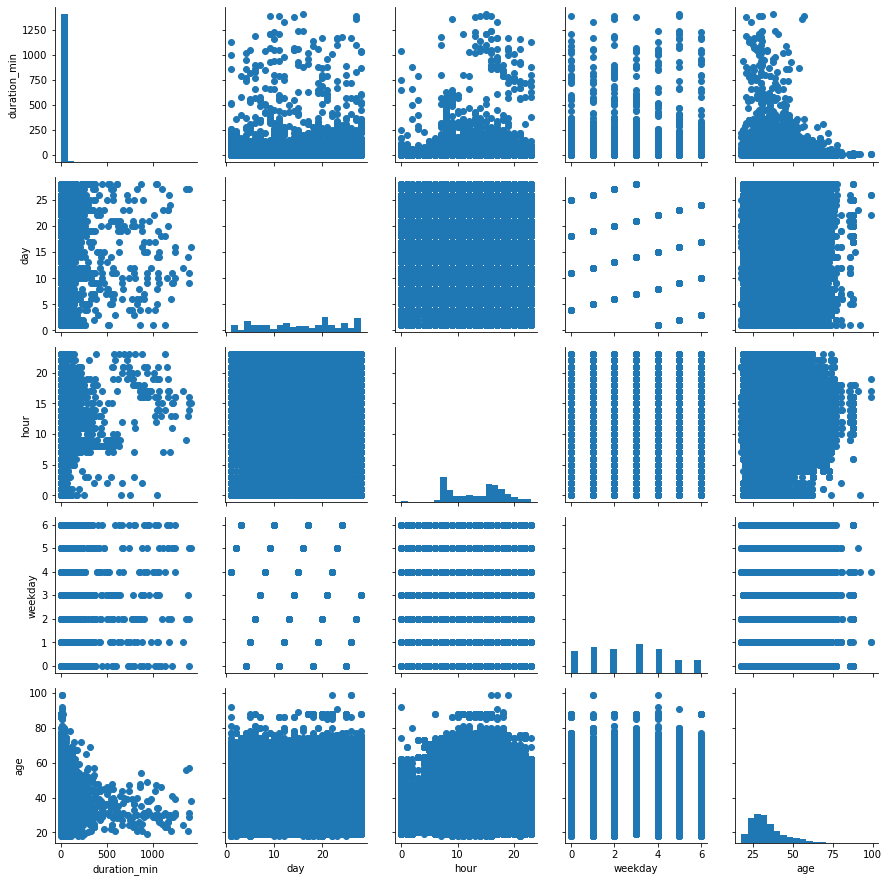

In [33]:
# Draw plot matrix
g = sb.PairGrid(data = df, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

What is interesting here is the relatinship between Age and Duration in minutes. It looks like longer durations are associated with younger users.

Another interesting observation is the relationship between the riding hour and durtion. There appears to be a gap between short trips and longer trips in the afternoon period.

Let's have a closer look on both

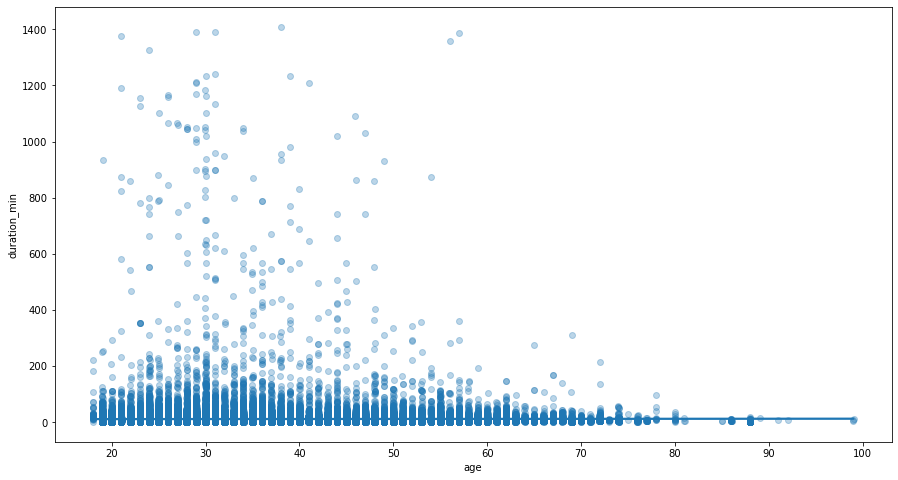

In [34]:
plt.figure(figsize=[15,8])
sb.regplot(data = df, x = 'age', y = 'duration_min', x_jitter=0.04, scatter_kws={'alpha': 3/10});

After adjusting alpha, it is now clear that the number of long duration trips (longer than 200 minutes) is not high .. Interestingly There is a somehow continous line at the 30 years old age, indicating that users of 30 years old tend to make the most versatile trip duratoins.

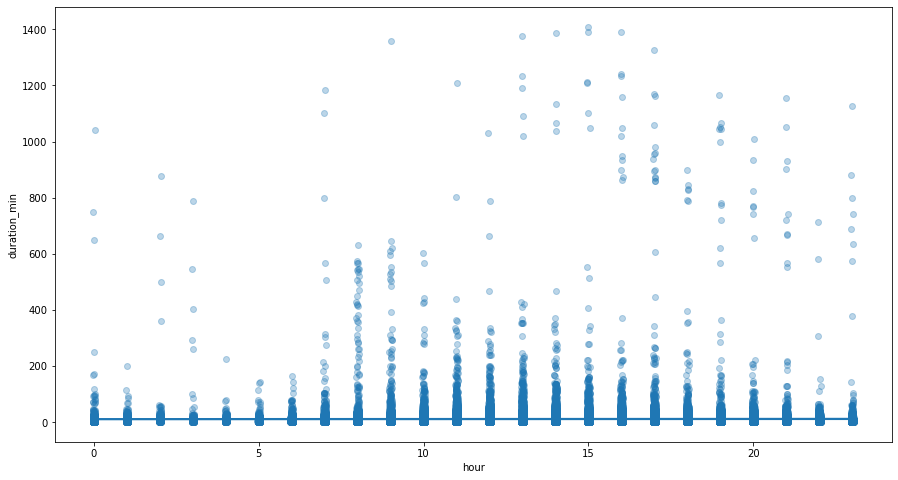

In [35]:
plt.figure(figsize=[15,8])
sb.regplot(data = df, x = 'hour', y = 'duration_min', x_jitter=0.04, scatter_kws={'alpha': 3/10});

The gap observatoin is valide, although it is not strong from the frequency point of view.

From 12 am to 6 am trip durations tend to be short (less than an hour)

from 8 am to 12 pm trip durations tend to be longer, we can see semi continous line at 8 am for durations up to 10 hours.

But then starting from 1 pm till the end of the day we can see gaps. It is clear between 1 pm and 4 pm, The upper and lower limits of the gaps decrease as we move towards the end of the day.

It looks like bike users tend to keep the bike to the next morning if the trip wasn't ended by the 10 or 11 pm., so for example trips started at 8 pm, either have durations less than 3 hours (till 11 pm) or longer than 11 hours (till 7 am or later).


Let see also mean trip durations over the week days

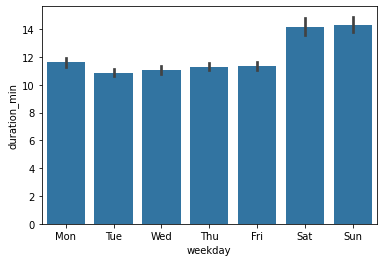

In [36]:
sb.barplot(data=df, x = 'weekday', y = 'duration_min', color=base_color)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);


It is clear that weekends have longer durations on average of about 14 min, while average duration on weekdays is less than 12

Mean trip durations over the days

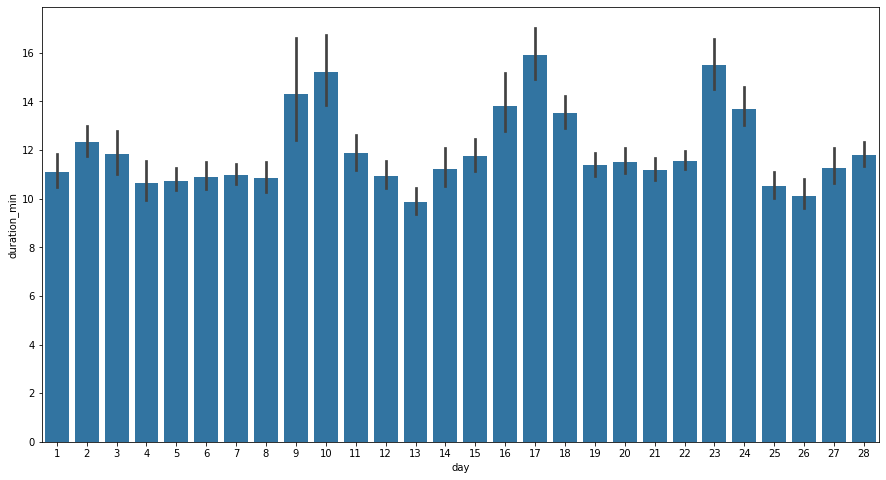

In [37]:
plt.figure(figsize=[15,8])
sb.barplot(data=df, x = 'day', y = 'duration_min', color=base_color);

We can see the shortest mean on 13 of Feb.

Let's now see how user type, gender and "bike share for all" program affect the duration

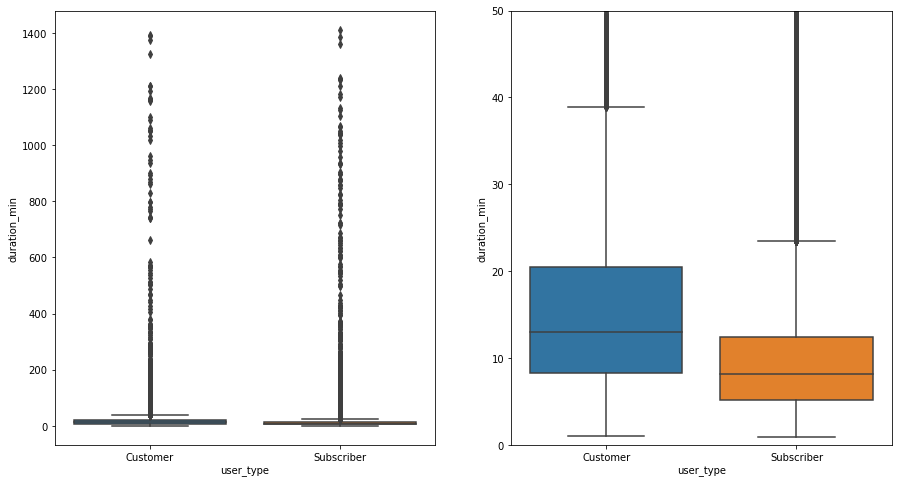

In [38]:
# Boxplot durations vs user type.
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)
sb.boxplot(data=df, x='user_type', y='duration_min');
plt.subplot(1,2,2)
sb.boxplot(data=df, x='user_type', y='duration_min');
plt.ylim(0,50);

The large number of outliers makes the drawing not clear, by limiting the y axis we can actually see that subscribers tend to make shorter trip durations.

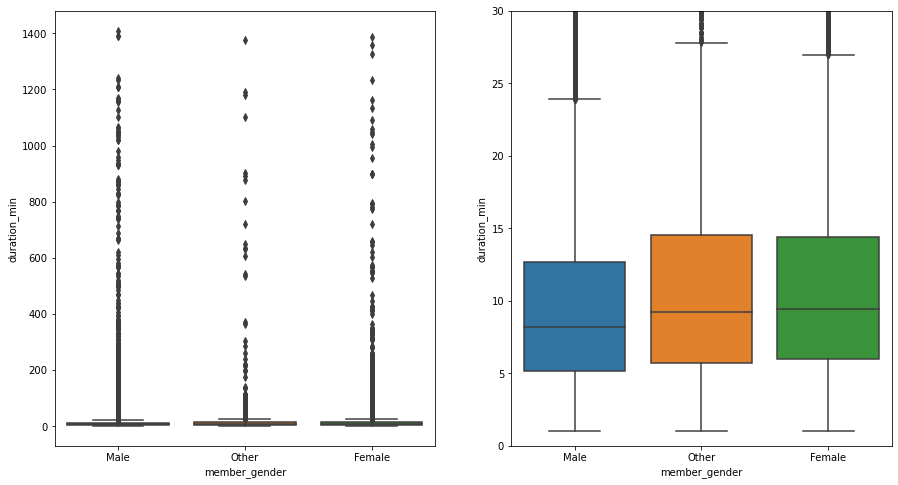

In [39]:
# Boxplot durations vs member gender.
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)
sb.boxplot(data=df, x='member_gender', y='duration_min');
plt.subplot(1,2,2)
sb.boxplot(data=df, x='member_gender', y='duration_min');
plt.ylim(0,30);

Again, we have to limit the y axis to be able to see the graph better.

Apparently men make slightly shorter duration than women and other, maybe they drive faster? Females and others are almost identical.

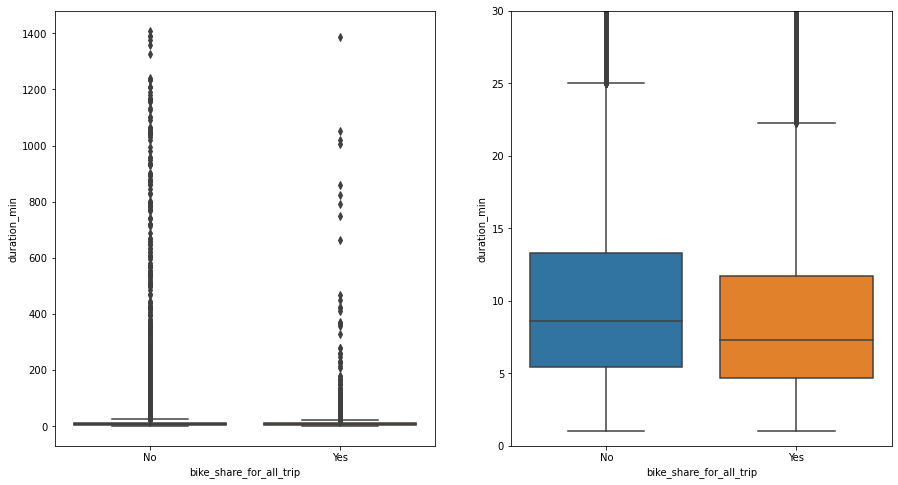

In [40]:
# Boxplot durations vs 'Bike shaer for all'.
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)
sb.boxplot(data=df, x='bike_share_for_all_trip', y='duration_min');
plt.subplot(1,2,2)
sb.boxplot(data=df, x='bike_share_for_all_trip', y='duration_min');
plt.ylim(0,30);

"Bike share for all" trips tend to be slightly shorter in duration.

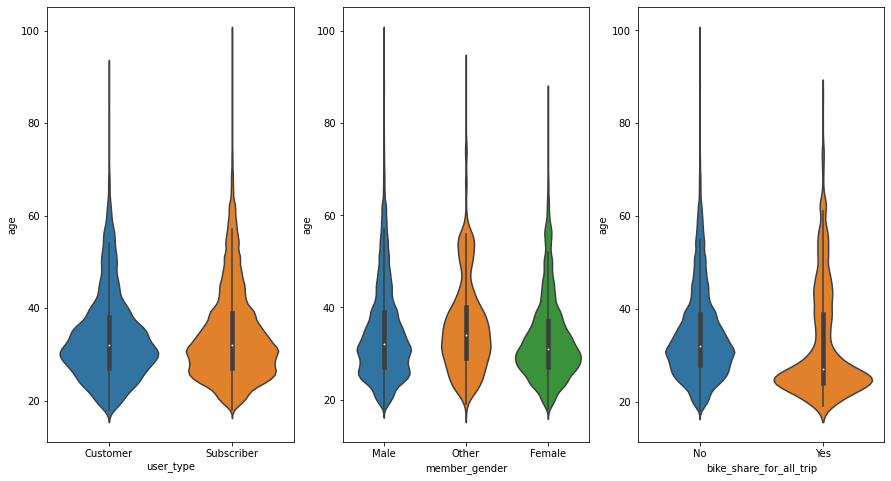

In [41]:
# Boxplot age vs user type.
plt.figure(figsize=[15,8])
plt.subplot(1,3,1)
sb.violinplot(data=df, x='user_type', y='age');
#sb.boxenplot(data=df, x='user_type', y='age');
plt.subplot(1,3,2)
sb.violinplot(data=df, x='member_gender', y='age');
plt.subplot(1,3,3)
sb.violinplot(data=df, x='bike_share_for_all_trip', y='age');


The most interesting observation here is that the mod of "bike share for all" trips is clearly lower than the mod of non "bike share for all" trips, The third graph showes younger people are taking the "bike share for all" trips more than older people. That makes sense with the previous observation of their shorter trip duration, as younger bike users are expected to drive faster.

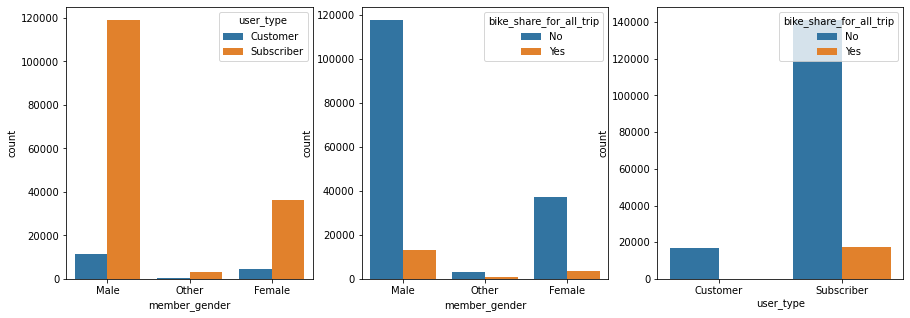

In [42]:
#Clustered bar plots to see the relationships between type, gender and "bike share for all" on each other
plt.figure(figsize=[15, 5]);
plt.subplot(1, 3, 1)
sb.countplot(data=df, x='member_gender', hue='user_type');
plt.subplot(1, 3, 2)
sb.countplot(data=df, x='member_gender', hue='bike_share_for_all_trip');
plt.subplot(1, 3, 3)
sb.countplot(data=df, x='user_type', hue='bike_share_for_all_trip');

From this graph we can note two notes:
1. "Bike share for all" trips are for subscribers only.
2. The ratio between male subscribers to female subscribers is higher than the ratio between male customer to female customer. This indicates that men's tendency to subscribe is heigher than female's


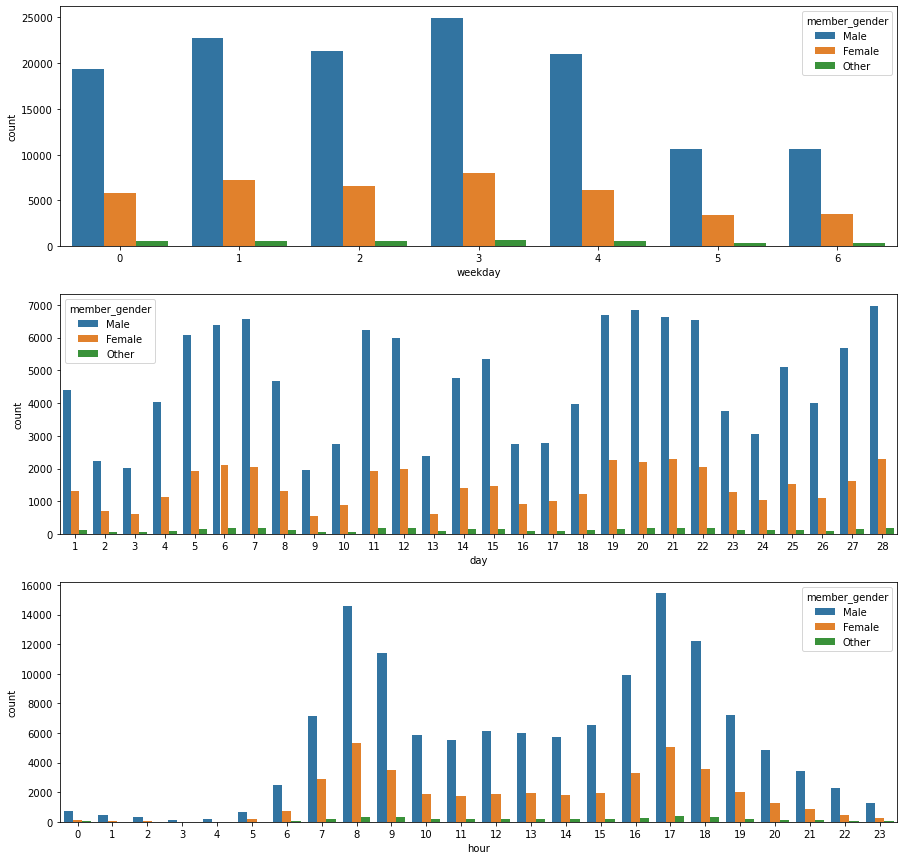

In [43]:
# Clusterd barplots to see the effect of categorical features on numerical distributions
plt.figure(figsize=[15, 15])
plt.subplot(3, 1, 1)
sb.countplot(data=df, x='weekday', hue='member_gender', hue_order=['Male', 'Female', 'Other']);

plt.subplot(3, 1, 2)
sb.countplot(data=df, x='day', hue='member_gender', hue_order=['Male', 'Female', 'Other']);


plt.subplot(3, 1, 3)
sb.countplot(data=df, x='hour', hue='member_gender', hue_order=['Male', 'Female', 'Other']);

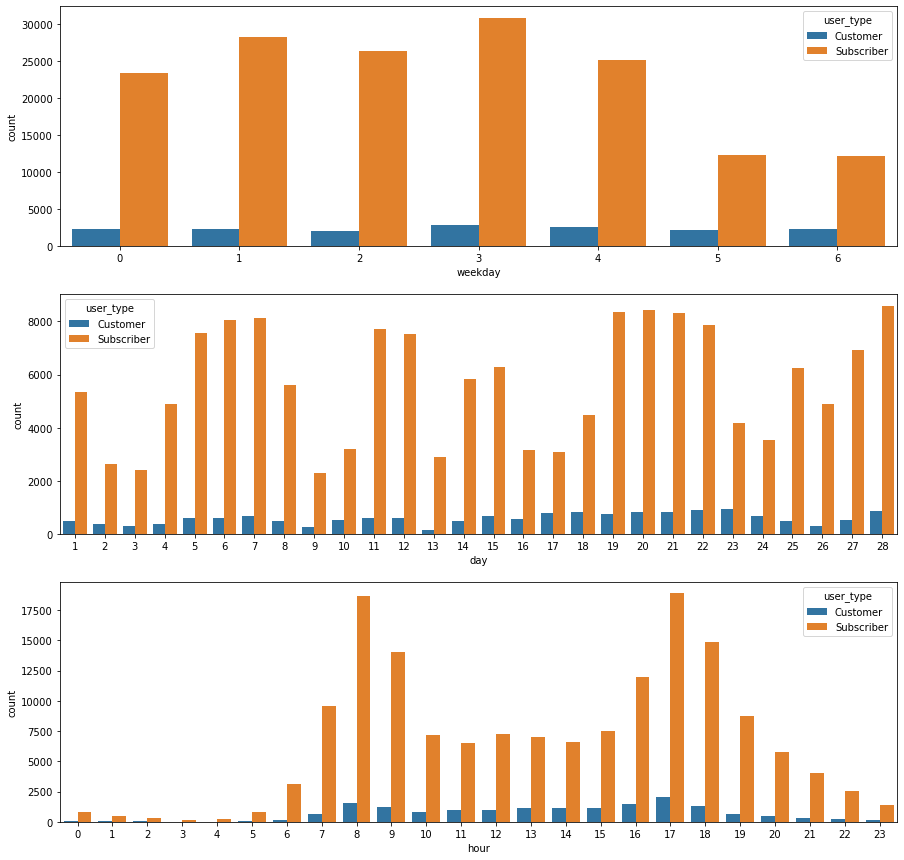

In [44]:
# Clusterd barplots to see the effect of categorical features on numerical distributions
plt.figure(figsize=[15, 15])
plt.subplot(3, 1, 1)
sb.countplot(data=df, x='weekday', hue='user_type');

plt.subplot(3, 1, 2)
sb.countplot(data=df, x='day', hue='user_type');


plt.subplot(3, 1, 3)
sb.countplot(data=df, x='hour', hue='user_type');

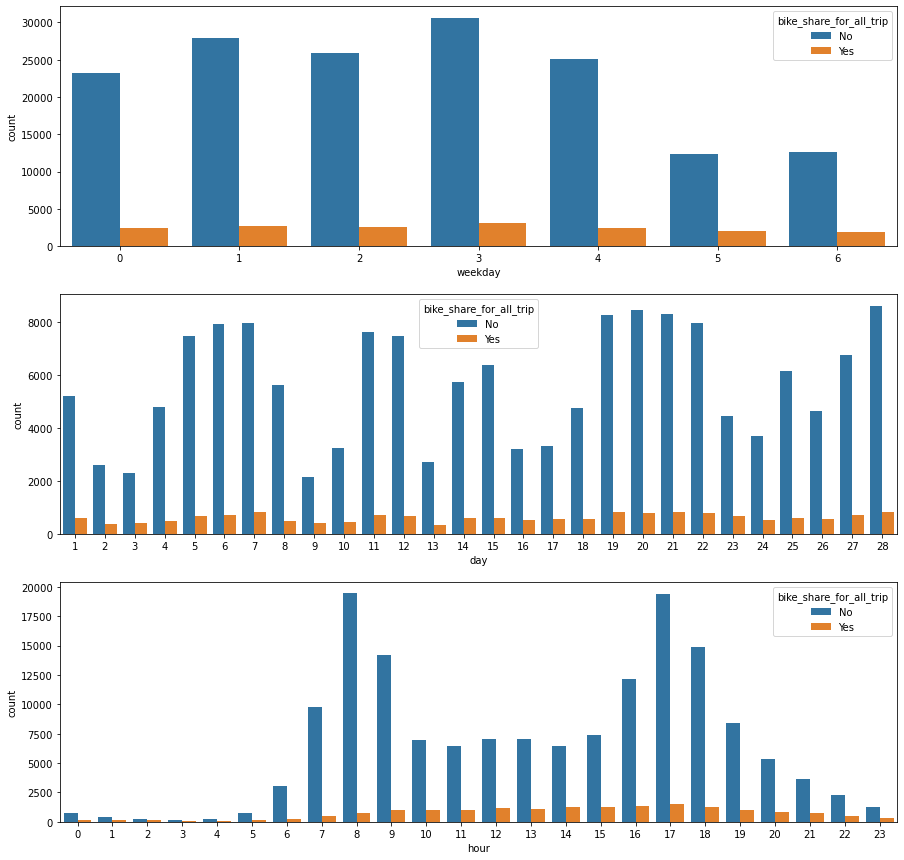

In [45]:
# Clusterd barplots to see the effect of categorical features on numerical distributions
plt.figure(figsize=[15, 15])
plt.subplot(3, 1, 1)
sb.countplot(data=df, x='weekday', hue='bike_share_for_all_trip');

plt.subplot(3, 1, 2)
sb.countplot(data=df, x='day', hue='bike_share_for_all_trip');


plt.subplot(3, 1, 3)
sb.countplot(data=df, x='hour', hue='bike_share_for_all_trip');

Looks like "bike share for all" trips are less affected by hour, day and day of the week than other trips.

We can see also that 13th of Feb showing less numbers than expected, almost in the range of a weekend.
Since the numbers of that day show normal proportions in terms of gender, user type, and "bike share for all" trips, then probably there was a reason for some people to stop using the bikes.

After some research it turned out that there was a winter strom in the bay area that brought strong winds and heave snow (refer to refernces)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Duration tends to be shorter with the increase of the age, which makes sense, as in general elder people are less physical than younger people.

I have noticed also that duration varies with trip start hour. It is clear that, when a trip duration gets long, users tend to contiune the trip to the next morning, rather than ending it late at night, which makes durations of trips that starts after 1 pm dramatically increase after passing a certain threshold.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, for example:

1. On 13th of Feb, there was a winter storm that made less users make trips on that day.
1. On the average customers tend to make longer trips than subscribers
2. Men tend to make shorter durations
3. "Bike share for all" trips are for subscribers only, and they tend to make shorter durations.


## Multivariate Exploration

Let's have a closer look into the relationship between trip duration and age, divided into different genders

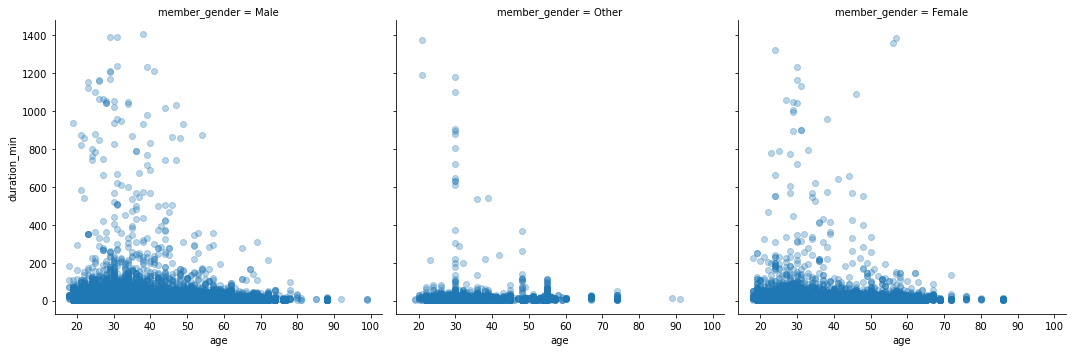

In [46]:
# Closer look on the previous observation
g=sb.FacetGrid(data=df, col='member_gender', height = 5)
g.map(plt.scatter, 'age', 'duration_min', alpha=.3);

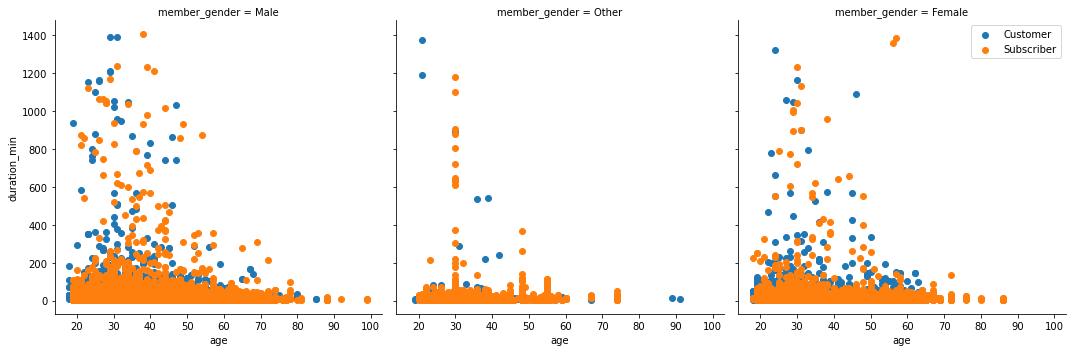

In [47]:
# Closer look on the previous observation
g=sb.FacetGrid(data=df, col='member_gender', height = 5, hue='user_type')
g.map(plt.scatter, 'age', 'duration_min');
plt.legend();

We can see that long durations are rare after the age of 60, and that subscribers tend to make shorter durations.

We can see here that longer duraitons are correlated with younger age, however, for users of gender Others, longer durations are concentrated at the age of 30, and rare for any other age. Maybe this is a default setting for data entry.

The number of long durations for men is more than the long durations for women.

Let see also mean trip durations over the week days

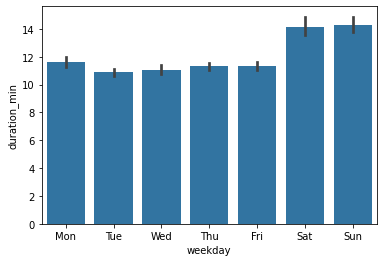

In [48]:
sb.barplot(data=df, x = 'weekday', y = 'duration_min', color=base_color)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);

It is clear that weekends have longer durations on average of about 14 min, while average duration on weekdays is less than 12

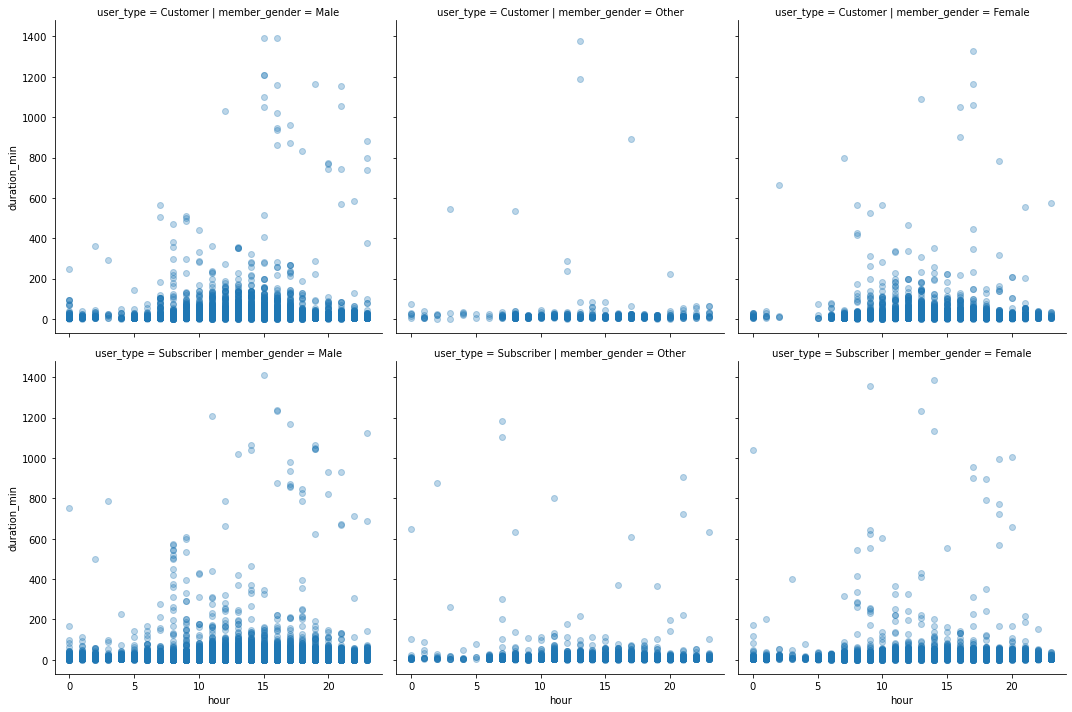

In [49]:
# FacetGrid of scatter plots between durations, gender, hued with user type.
g=sb.FacetGrid(data=df, col='member_gender', height = 5, row='user_type')
g.map(plt.scatter, 'hour', 'duration_min', alpha=.3);

Looking closer to the gap we noticed in the durations vs hours scatter plot, we can see it is less clear with users of Others gender regardless of user type, and women who are of customer type. it might be due to the small number of those grops.

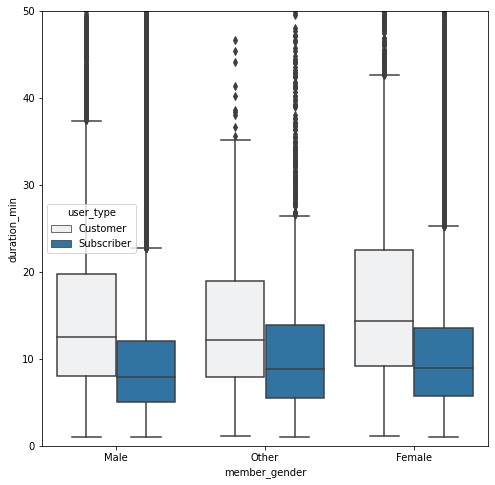

In [50]:
# Duration boxplots by gender and user type
plt.figure(figsize=[8,8])
sb.boxplot(data=df, x='member_gender', y='duration_min', hue='user_type', color=base_color);
plt.ylim(0,50);

Let's have a look on how average trip time is distributed over the weekdays for different genders.

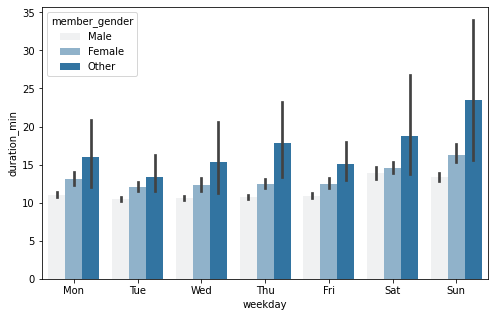

In [51]:
plt.figure(figsize=[8,5])
sb.barplot(data=df, x = 'weekday', y = 'duration_min', hue='member_gender',
           color=base_color, hue_order=['Male', 'Female', 'Other'])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);

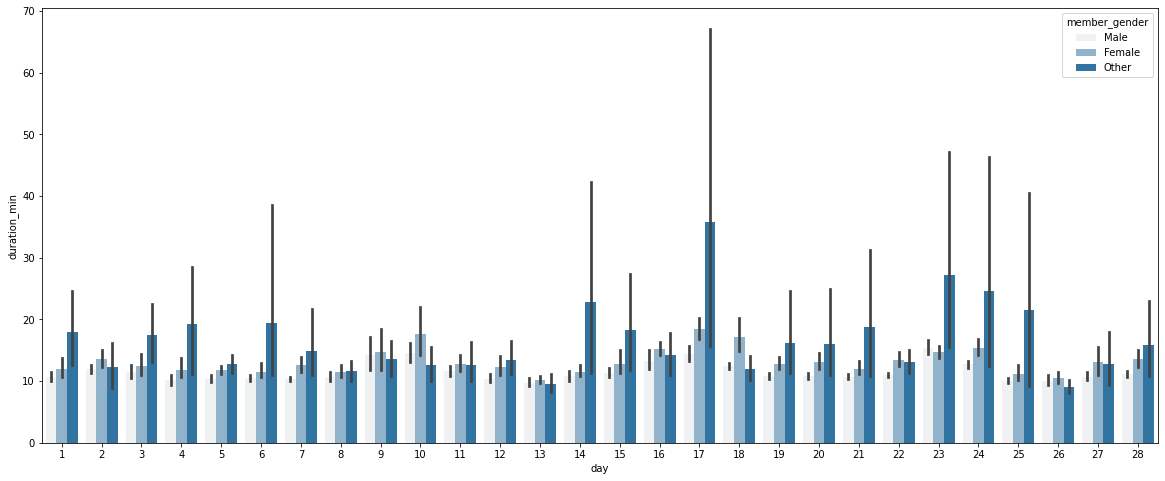

In [52]:
#
plt.figure(figsize=[20,8])
sb.barplot(data=df, x = 'day', y = 'duration_min', hue='member_gender',
           color=base_color, hue_order=['Male', 'Female', 'Other']);

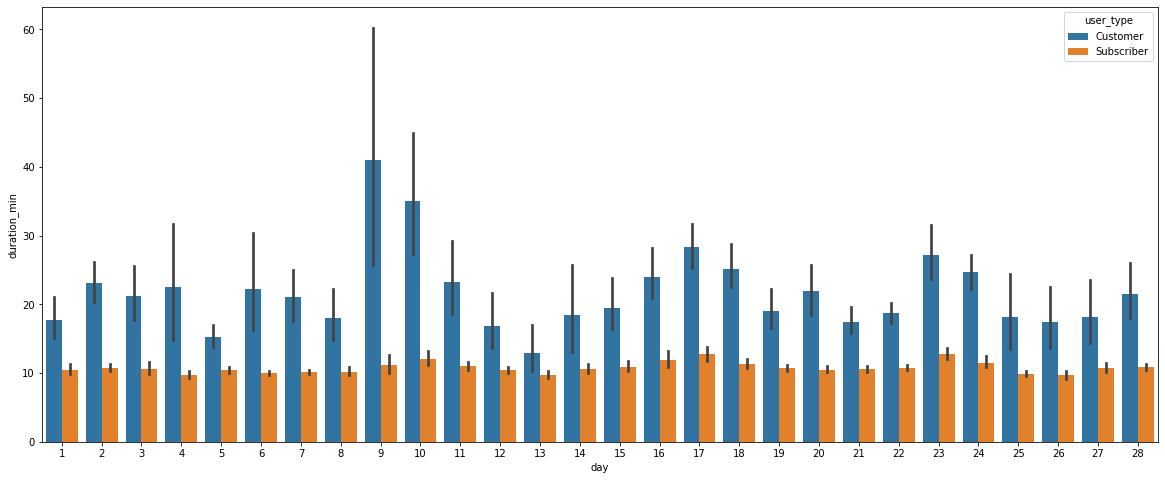

In [53]:
plt.figure(figsize=[20,8])
sb.barplot(data=df, x = 'day', y = 'duration_min', hue='user_type');

Subscribers are making their shortest average duraiton on 13th of Feb.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

We are still able to see the relationship between trip duration and user age, however when we split this relationship into gender groups, we can see an abnormal concentration for trips done by 30 years old users of gender type Other who are subscribers. This needs further investigation outside the scope of this report, however one possible reason could be a default settings of subscription data entry.


Gaps in the trip durations are still observable for trips made by males, and trips made by subscriber females, indicating that those groups of users prefer to return bikes next morning rather than late in the night.





### Were there any interesting or surprising interactions between features?

Feb 13th continued to show less numbers than expected, it had the least average trip duraiton for subscriber thought the whole month. it turned out that there was a winter storm on that day.